- DANN
- kd-tree
- LSH

# 1. Imports

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# 2. Data
## 2.1. Data Import

In [5]:
data = pd.read_csv('../data/chips.txt')
data.head()

,x,y,cls
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [6]:
data['cls'].value_counts()

0    60
1    58
Name: cls, dtype: int64

In [7]:
X = data[['x', 'y']]
y = data['cls']

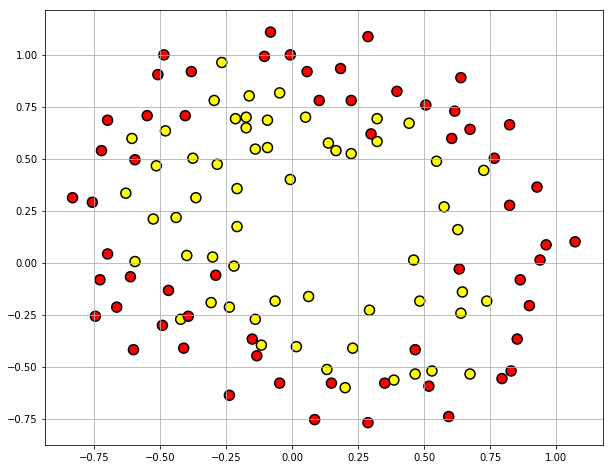

In [8]:
# Look at the data
plt.figure(figsize=(10, 8))
plot_row = plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100,
                       cmap='autumn', edgecolors='black', linewidth=1.5)
plt.grid();

## 2.2. Train/test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
X_train.shape
X_test.shape

y_train.shape
y_test.shape

(94, 2)

(24, 2)

(94,)

(24,)

# 3. Modeling
## 3.1. Sklearn-Knn

In [11]:
cls_knn_sk = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [12]:
cls_knn_sk.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
cls_knn_sk.predict(X_test)

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1])

In [14]:
cls_knn_sk.predict_proba(X_test)[:10]

array([[0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.4, 0.6],
       [0.8, 0.2]])

In [15]:
cls_knn_sk.score(X_train, y_train)
cls_knn_sk.score(X_test, y_test)

0.8085106382978723

0.75

In [16]:
f1_score(y_train, cls_knn_sk.predict(X_train))
f1_score(y_test, cls_knn_sk.predict(X_test))

0.8043478260869565

0.75

## 3.2. My KnnClassifier

In [17]:
from KnnClassifier import KnnClassifier

In [18]:
knn = KnnClassifier(n_neighbors=5, scaler=None, 
                    kernel='kernel_gauss', h=-1,
                    metric='minkowski', p=2)

In [19]:
knn._get_param_names()
knn.get_params()
knn.set_params(scaler = 'MinMaxScaler')
knn._estimator_type

['h', 'kernel', 'metric', 'n_neighbors', 'p', 'scaler', 'weights']

{'h': -1,
 'kernel': 'kernel_gauss',
 'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 2,
 'scaler': None,
 'weights': 'uniform'}

KnnClassifier(h=-1, kernel='kernel_gauss', metric='minkowski', n_neighbors=5,
       p=2, scaler='MinMaxScaler', weights='uniform')

'classifier'

In [20]:
knn.fit(X_train, y_train)

In [21]:
knn._predict(X_test)

array([[0.24579824, 0.75420176],
       [0.55085153, 0.44914847],
       [0.23714176, 0.76285824],
       [0.19402717, 0.80597283],
       [0.81992571, 0.18007429],
       [0.81110564, 0.18889436],
       [0.79557133, 0.20442867],
       [0.65578031, 0.34421969],
       [0.45619488, 0.54380512],
       [0.77817265, 0.22182735],
       [0.        , 1.        ],
       [0.79489083, 0.20510917],
       [0.79338833, 0.20661167],
       [1.        , 0.        ],
       [0.21471783, 0.78528217],
       [0.        , 1.        ],
       [0.2106908 , 0.7893092 ],
       [0.40331124, 0.59668876],
       [0.58548416, 0.41451584],
       [1.        , 0.        ],
       [0.57769754, 0.42230246],
       [0.19009757, 0.80990243],
       [0.61481106, 0.38518894],
       [0.        , 1.        ]])

In [22]:
knn.score(X_train, y_train)
knn.score(X_test, y_test)

0.8314606741573034

0.7826086956521738

# 4. GridSearchCV

In [23]:
kf = KFold(n_splits=5, shuffle=True, random_state=112358)

In [24]:
param_grid_knn = {
    'n_neighbors':[4, 5, 6],
    'kernel':[None,
              'kernel_gauss',
#               'kernel_epanechnikov',
#               'kernel_tri_cube'
             ],
    'metric':['minkowski'],
    'p':[1]
}

param_grid_cls_knn = {
    'n_neighbors':[4, 5, 6],
    'leaf_size':[15, 20],
    'p':[1, 2]
}

## 4.1. GridSearchCV for my Knn

In [25]:
knn_cv = GridSearchCV(knn, param_grid_knn, scoring='f1', cv=kf, verbose=0, n_jobs=-1) # cv=loo.split(X)

In [26]:
knn_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=112358, shuffle=True),
       error_score='raise',
       estimator=KnnClassifier(h=-1, kernel='kernel_gauss', metric='minkowski', n_neighbors=5,
       p=2, scaler='MinMaxScaler', weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6], 'kernel': [None, 'kernel_gauss'], 'metric': ['minkowski'], 'p': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [27]:
knn_cv.best_score_
knn_cv.best_estimator_

0.7482826652318177

KnnClassifier(h=-1, kernel=None, metric='minkowski', n_neighbors=5, p=1,
       scaler='MinMaxScaler', weights='uniform')

## 4.2. GridSearchCV for sklearn Knn

In [28]:
cls_knn_cv = GridSearchCV(cls_knn_sk, param_grid_cls_knn, scoring='f1', cv=kf, verbose=0, n_jobs=-1) # cv=loo.split(X)

In [29]:
cls_knn_cv.fit(X, y)

GridSearchCV(cv=KFold(n_splits=5, random_state=112358, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [4, 5, 6], 'leaf_size': [15, 20], 'p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [30]:
cls_knn_cv.best_score_
cls_knn_cv.best_estimator_

0.7572003566021511

KNeighborsClassifier(algorithm='auto', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=1,
           weights='uniform')

# 5. Visualisation

In [31]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                       np.arange(y_min, y_max, eps))

In [32]:
# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(X.values, eps=.05)

predicted = knn_cv.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

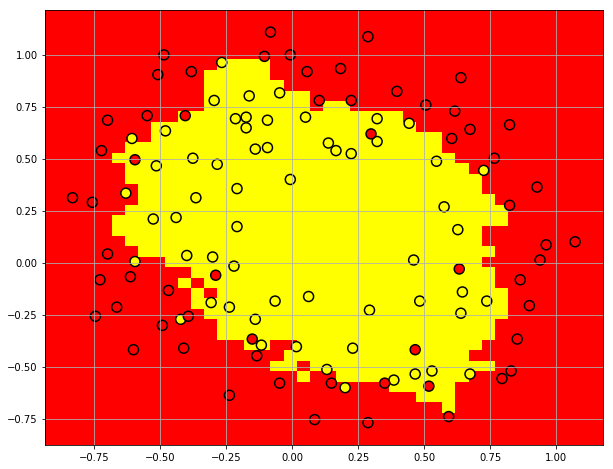

In [33]:
plt.figure(figsize=(10, 8))
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.xlim(plot_row.axes.get_xlim())
plt.ylim(plot_row.axes.get_ylim())
plt.grid();